In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [12]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')

In [13]:
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


In [14]:
df.shape

(346, 10)

__Convert to date time object__

In [15]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


__Data visualization and pre-processing__

Let’s see how many of each class is in our data set

In [16]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [17]:
!conda install -c anaconda seaborn -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\guptdraj\Anaconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.26 |       haa95532_2         151 KB  anaconda
    certifi-2021.10.8          |   py39haa95532_0         155 KB  anaconda
    conda-4.12.0               |   py39haa95532_0        17.0 MB  anaconda
    openssl-1.1.1l             |       h2bbff1b_0         5.7 MB  anaconda
    seaborn-0.11.2             |     pyhd3eb1b0_0         223 KB  anaconda
    ------------------------------------------------------------
                                           Total:        23.2 MB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  certifi                                        

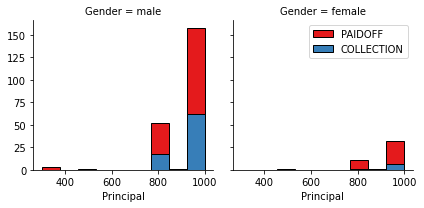

In [18]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

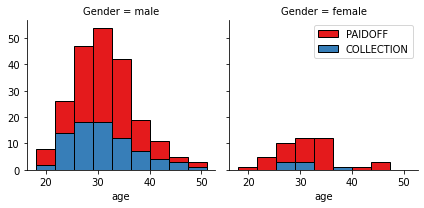

In [19]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

__Pre-processing: Feature selection/extraction__

Let's look at the day of the week people get the loan

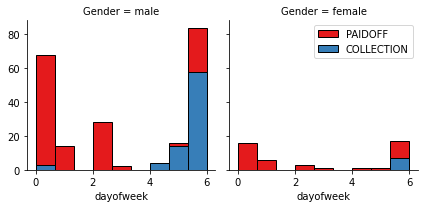

In [20]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4

In [21]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


__Convert Categorical features to numerical values__

Let's look at gender:

In [22]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan

Let's convert male to 0 and female to 1:

In [23]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


__One Hot Encoding__

Checking education?

In [24]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

__Features before One Hot Encoding__

In [25]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


__Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame__

In [26]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


__Feature Selection__

Let's define feature sets, X

In [27]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [28]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

__Normalize Data__

Data Standardization give data zero mean and unit variance (technically should be done after train test split)

In [29]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# __Classification__ #

In [39]:
from sklearn.metrics import jaccard_score, f1_score, log_loss

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

### __K Nearest Neighbor(KNN)__ ###

Find the best k to build the model with the best accuracy.(Should not use the loan_test.csv for finding the best k, however, can split train_loan.csv into train and test to find the best k.)

In [45]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, y_train)
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [46]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i+1, mean_accuracy[i]))

k = 1 has a Score = 0.6428571428571429 
k = 2 has a Score = 0.5571428571428572 
k = 3 has a Score = 0.7142857142857143 
k = 4 has a Score = 0.6285714285714286 
k = 5 has a Score = 0.7571428571428571 
k = 6 has a Score = 0.6571428571428571 
k = 7 has a Score = 0.7571428571428571 
k = 8 has a Score = 0.7142857142857143 
k = 9 has a Score = 0.7 


Text(0, 0.5, 'Testing Accuracy Values')

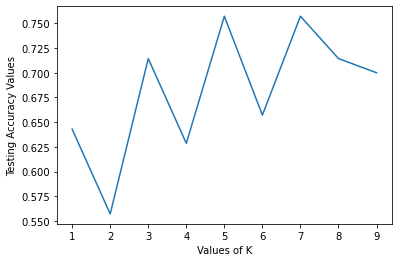

In [47]:
# Relation between k's and their respective accuracies

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

In [48]:
# Final Model with best value of k

knn_model = knn(n_neighbors = 7)
knn_model.fit(X_train, y_train)
knn_yhat = knn_model.predict(X_test)

knn_model

KNeighborsClassifier(n_neighbors=7)

### __Decision Tree__ ###

In [49]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [53]:
depth_range = range(1, 10)
jaccard_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_score_.append(jaccard_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

TypeError: 'list' object is not callable

In [54]:
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(x_train, y_train)
    dt_yhat = dt.predict(x_test)
    print("For depth = {}  the accuracy score is {} ".format(d, accuracy_score(y_test, dt_yhat)))

For depth = 1  the accuracy score is 0.8285714285714286 
For depth = 2  the accuracy score is 0.6857142857142857 
For depth = 3  the accuracy score is 0.8142857142857143 
For depth = 4  the accuracy score is 0.7 
For depth = 5  the accuracy score is 0.7428571428571429 
For depth = 6  the accuracy score is 0.6142857142857143 
For depth = 7  the accuracy score is 0.6285714285714286 
For depth = 8  the accuracy score is 0.6 
For depth = 9  the accuracy score is 0.5571428571428572 


In [55]:
print("The best value of depth is d = 2 ")

The best value of depth is d = 2 


In [56]:
## Creating the best model for decision tree with best value of depth 2

best_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2).fit(x_train, y_train)
best_dt_model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [57]:
## Evaluation Metrics
# f1 score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_dt_model.predict(x_train),pos_label = "PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_dt_model.predict(x_test),pos_label = "PAIDOFF"))

print("Train set Accuracy (F1): ", f1_score(y_train, best_dt_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_dt_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.6954732510288066
Test set Accuracy (Jaccard):  0.6716417910447762
Train set Accuracy (F1):  0.7268266698828116
Test set Accuracy (F1):  0.7025510204081633


### __Support Vector Machine__ ###

In [58]:
#importing svm
from sklearn import svm 
from sklearn.metrics import f1_score

In [59]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(x_train,y_train)
    svm_yhat = svm_model.predict(x_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.7508928571428571
For kernel: poly, the f1 score is: 0.729142857142857
For kernel: rbf, the f1 score is: 0.7508928571428571
For kernel: sigmoid, the f1 score is: 0.8013714285714285


In [60]:
print("We can see the rbf has the best f1 score of 0.7275882012724117 ")

We can see the rbf has the best f1 score of 0.7275882012724117 


In [61]:
## building best SVM with kernel = rbf
best_svm = svm.SVC(kernel='rbf').fit(x_train,y_train)
best_svm

SVC()

In [67]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_svm.predict(x_train),pos_label = "PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_svm.predict(x_test),pos_label = "PAIDOFF"))

print("Train set Accuracy (F1): ", f1_score(y_train, best_svm.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_svm.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7345454545454545
Test set Accuracy (Jaccard):  0.8285714285714286
Train set Accuracy (F1):  0.6270264029410871
Test set Accuracy (F1):  0.7508928571428571


### __Logistic Regression__ ###

In [68]:
# importing libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

In [69]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.48528444791433034
When Solver is saga, logloss is : 0.4852850677501109
When Solver is liblinear, logloss is : 0.5896970347899092
When Solver is newton-cg, logloss is : 0.48528523579096117
When Solver is sag, logloss is : 0.4852939759424953


In [70]:
print("We can see that the best solver is liblinear of 0.5772287609479654")

We can see that the best solver is liblinear of 0.5772287609479654


In [71]:
# Best logistic regression model with liblinear solver

best_lr_model = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)
best_lr_model

LogisticRegression(C=0.01, solver='liblinear')

In [72]:
## Evaluation Metrics
# jaccard score and f1 score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_lr_model.predict(x_train),pos_label = "PAIDOFF"))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_lr_model.predict(x_test),pos_label = "PAIDOFF"))

print("Train set Accuracy (F1): ", f1_score(y_train, best_lr_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_lr_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.7318840579710145
Test set Accuracy (Jaccard):  0.8285714285714286
Train set Accuracy (F1):  0.6185798314232005
Test set Accuracy (F1):  0.7508928571428571


### __Load Test set for evaluation__ ###

In [74]:
test_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [75]:
# data processing
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)


x_loan_test = Feature1
x_loan_test = preprocessing.StandardScaler().fit(x_loan_test).transform(x_loan_test)

y_loan_test = test_df['loan_status'].values

In [76]:
# Jaccard

# KNN
knn_yhat = best_knn_model.predict(x_loan_test)
jacc1 = round(jaccard_score(y_loan_test, knn_yhat,pos_label = "PAIDOFF"), 2)

# Decision Tree
dt_yhat = best_dt_model.predict(x_loan_test)
jacc2 = round(jaccard_score(y_loan_test, dt_yhat,pos_label = "PAIDOFF"), 2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
jacc3 = round(jaccard_score(y_loan_test, svm_yhat,pos_label = "PAIDOFF"), 2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
jacc4 = round(jaccard_score(y_loan_test, lr_yhat,pos_label = "PAIDOFF"), 2)

jss = [jacc1, jacc2, jacc3, jacc4]
jss

[0.78, 0.63, 0.75, 0.75]

In [77]:
# F1_score

# KNN
knn_yhat = best_knn_model.predict(x_loan_test)
f1 = round(f1_score(y_loan_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = best_dt_model.predict(x_loan_test)
f2 = round(f1_score(y_loan_test, dt_yhat, average = 'weighted'), 2)

# Support Vector Machine
svm_yhat = best_svm.predict(x_loan_test)
f3 = round(f1_score(y_loan_test, svm_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = best_lr_model.predict(x_loan_test)
f4 = round(f1_score(y_loan_test, lr_yhat, average = 'weighted'), 2)

f1_list = [f1, f2, f3, f4]
f1_list

[0.8, 0.65, 0.65, 0.64]

In [78]:
# log loss

# Logistic Regression
lr_prob = best_lr_model.predict_proba(x_loan_test)
ll_list = ['NA','NA','NA', round(log_loss(y_loan_test, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.61]

In [79]:
columns = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']

accuracy_df = pd.DataFrame([jss, f1_list, ll_list], index = index, columns = columns)
accuracy_df1 = accuracy_df.transpose()
accuracy_df1.columns.name = 'Algorithm'
accuracy_df1

Algorithm,Jaccard,F1-score,Logloss
KNN,0.78,0.8,NA
Decision Tree,0.63,0.65,NA
SVM,0.75,0.65,NA
Logistic Regression,0.75,0.64,0.61
